In [1]:
%config InlineBackend.figure_formats = ["retina"]

In [2]:
!pip install -q folium census seaborn geopandas

# Communities of Interest and Participatory Mapping

In [130]:
import json

import census
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from census import Census

In [195]:
!curl -O https://raw.githubusercontent.com/PUBPOL-2130/notebooks/refs/heads/main/data/mi_cois.json.zip
!curl -O https://raw.githubusercontent.com/PUBPOL-2130/notebooks/refs/heads/main/data/wi_cois.json.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26.0M  100 26.0M    0     0  25.8M      0  0:00:01  0:00:01 --:--:-- 25.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7176k  100 7176k    0     0  17.8M      0 --:--:-- --:--:-- --:--:-- 17.9M


In [196]:
!unzip mi_cois.json.zip
!unzip wi_cois.json.zip

Archive:  mi_cois.json.zip
  inflating: mi_cois.json            
Archive:  wi_cois.json.zip
  inflating: wi_cois.json            


In [28]:
mi_df = pd.read_json(open("mi_cois.json"), orient="records")

In [29]:
wi_df = pd.read_json(open("wi_cois.json"), orient="records")

In [30]:
mi_df

,districtr_id,submission_title,submission_text,area_name,area_text,blocks_2020,labels
0,17124-1,Dearborn Cultural District,Cultural venues in Dearborn. Important that th...,Community 1,None,"[261635799004005, 261639838003006, 26163983800...",[]
1,17128-1,Dearborn neighborhoods near Ford Field,"Area includes residents west of Brady, north o...",Dearborn Ford Field Neighbors,"Neighborhoods using Ford Field, north of Michi...","[261635749001029, 261635749001005, 26163579900...",[]
2,17892-1,Example: Grand Rapids center and exurbs,This map shows the Grand Rapids urban center a...,urban center,The denser and more urbanized part of Grand Ra...,"[260810016002007, 260810009002022, 26081013300...",[cities]
3,17892-2,Example: Grand Rapids center and exurbs,This map shows the Grand Rapids urban center a...,exurbs,"Extending past Hudsonville to the West, these ...","[260810133002001, 260810112003002, 26081011200...",[cities]
4,17892-1,ADA reviews,0,urban center,The denser and more urbanized part of Grand Ra...,"[260810016002007, 260810009002022, 26081013300...",[cities]
...,...,...,...,...,...,...,...
1032,41407-1,"Calhoun, Branch, Hillsdale map",Grouping of like community interests,District 1,None,"[260250015003035, 260239511003057, 26025002900...",[]
1033,41415-1,Congressional district map,Groups counties with like opinions and geograp...,District 1,None,"[260910606001000, 260250031002016, 26027001000...",[]
1034,41504-1,Lakeshore District - 79th,We need to ensure lakeshore communities are re...,District 1,None,"[261590114004032, 260210102011015, 26021000900...",[]
1035,41636-1,Keith B's Congressional Plan,These counties are more rural and agricultural...,District 1,None,"[260910606001000, 260250031002016, 26059051000...","[agriculture, nimby, suburbs]"


In [31]:
wi_df

,districtr_id,submission_title,submission_text,area_name,area_text,blocks_2020,labels
0,11542-1,Community of Interest (imported),How do the political lines in Wisconsin impact...,Lake Country,None,"[551332041003050, 551332042013001, 55133204400...",[named neighborhood]
1,11542-2,Community of Interest (imported),How do the political lines in Wisconsin impact...,Dousman/Summit,Rock River watershed,"[550551016001009, 551332041001033, 55133204004...","[environment, theory]"
2,11542-4,Community of Interest (imported),How do the political lines in Wisconsin impact...,Watertown south,None,"[550551011002026, 550551003012021, 55055101100...",[environment]
3,11623-1,Community of Interest (imported),Submitting on behalf of someone else?\nNo Rece...,Community 1,North Shore - my community of interest\nShorew...,"[550790703003009, 550790602004016, 55079080100...",[community engagement]
4,11623-2,Community of Interest (imported),Submitting on behalf of someone else?\nNo Rece...,Community 2,Brown Deer - sometimes included in the North S...,"[550790501031004, 550790501013027, 55079050104...",[personal-unusable-incoherent]
...,...,...,...,...,...,...,...
1145,33670-1,University of Wisconsin- Waukesha,This community of interest was drawn to ensur...,University of Wisconsin- Waukesha,The University of Wisconsin- Waukesha is the l...,"[551332031071001, 551332031072011, 55133203107...",[]
1146,34126-1,"Alexis' Map of Bay View, Milwaukee WI",This is my definition on the boundaries for Ba...,"Bay View, WI",Here's my take on the boundaries for the neigh...,"[550790180002041, 550790208003003, 55079020600...",[]
1147,34717-1,Iowa County functions as One Community,My community of interest is the entirety of Io...,Community of Iowa County,My community of interest is the entirety of Io...,"[550499504004045, 550499502001041, 55049950100...",[]
1148,34994-1,Unique Ecology Unites Unique Community,My community of interest is the entirety of Io...,Community of Iowa County,My community of interest is the entirety of Io...,"[550499504004045, 550499502001041, 55049950100...",[]


In [163]:
state_cois = {"Michigan": mi_df, "Wisconsin": wi_df}

In [164]:
for df in state_cois.values():
    df["coi_id"] = df["districtr_id"].str.split("-").str[0]

In [193]:
def sample_coi_text(df, n=10):
    sampled_cois = df["coi_id"].sample(n)
    for coi_id in sampled_cois:
        areas_df = df[df["coi_id"] == coi_id]
        labels = f"(labels: {', '.join(areas_df.iloc[0].labels)})" if areas_df.iloc[0].labels else ""
        print(f"-- COI: {areas_df.iloc[0].submission_title} {labels} (https://districtr.org/coi/{coi_id})")
        print(areas_df.iloc[0].submission_text, "\n")
        for _, area in areas_df.iterrows():
            if area.area_name:
                print(f"\t-- Area: {area.area_name}")
            if area.area_text:
                print(f"\t{area.area_text}")
        print()

In [194]:
sample_coi_text(state_cois["Michigan"])

-- COI: Mapping out "communities of interest"  (https://districtr.org/coi/37414)
I started this because I was thinking there was no way to accommodate all identified communities of interest, then I decided to draw them out and see.  The result is attached - most submissions up to this point are included. 

	-- Area: Dowagiac with Ontwa Twp.
	Observed community of interest in a post, also included in a post about keeping SW Michigan counties together.
	-- Area: Washtenaw County
	Observed to be a community of interest in a post.
	-- Area: "Downriver"
	Community of interest, conflicts with several other communities of interest.
	-- Area: Saginaw County
	Identified as a community of interest in a post.
	-- Area: Titawabasee River watershed
	Identified as a community of interest
	-- Area: Livingston County
	County identified as a community of interest in a post.
	-- Area: Fenton/Tyrone Twp.
	Identified as a community of interest.
	-- Area: Dunham Lake
	Identified as a community of interest.

## What do people talk about?

In [167]:
for state, df in state_cois.items():
    label_counts = Counter()
    for labels in df["labels"]:
        label_counts.update(labels)

    print(f"-- {state}")
    print(pd.Series(label_counts).sort_values(ascending=False))
    print()

-- Michigan
agriculture                           156
economy-commerce-industry              95
suburbs                                78
k12                                    59
recreation-tourism                     58
nimby                                  50
diversity                              45
cost-of-living-services-healthcare     45
environment                            43
infrastructure                         36
university                             30
cities                                 27
family-children                        20
vulnerable populations                 16
religion                               15
technology                             14
community engagement                    9
elderly                                 9
poverty                                 8
culture                                 3
policing                                3
dtype: int64

-- Wisconsin
personal-unusable-incoherent          156
economy-commerce-industry            

In [168]:
mi_ag_df = state_cois["Michigan"][state_cois["Michigan"]["labels"].apply(lambda labels: len(labels) <= 3 and "agriculture" in labels)]

In [169]:
sample_coi_text(mi_ag_df, n=5)

-- COI: US congress (labels: agriculture, suburbs)
agriculture small communities allow my voice in Washington DC 

	-- Area: District 1

-- COI: Calhoun Branch Hillsdale Senate (labels: agriculture, nimby, suburbs)
To keep rural community control separate from the bigger municipality influence. 

	-- Area: District 1

-- COI: Primary tourist and agriculture (labels: agriculture, economy-commerce-industry, recreation-tourism)
Population significantly under represented many months of the year as households are secondary and primary residency is credited somewhere else.  Very seasonal economy. 

	-- Area: Northwest Lower
	Tourism and Agriculture, seasonal economy, many second home properties not reflecting true size of population. 

-- COI: Van Buren & Allegan Community (labels: agriculture, recreation-tourism)
Allegan and Van Buren are like minded counties, we are rural and farming communities.  
As a Hamilton Township Treasurer for twenty years, i can say that every time we would send o

In [170]:
wi_incoherent_df = state_cois["Wisconsin"][
    state_cois["Wisconsin"]["labels"].apply(lambda labels: len(labels) <= 3 and "personal-unusable-incoherent" in labels)
]

sample_coi_text(wi_incoherent_df)

TODO (@Moon): could add some sort of word cloud visualization here... overkill?

## Scale effects: what is a community, anyway?

In [172]:
for df in state_cois.values():
    df["block_count"] = df["blocks_2020"].apply(len)

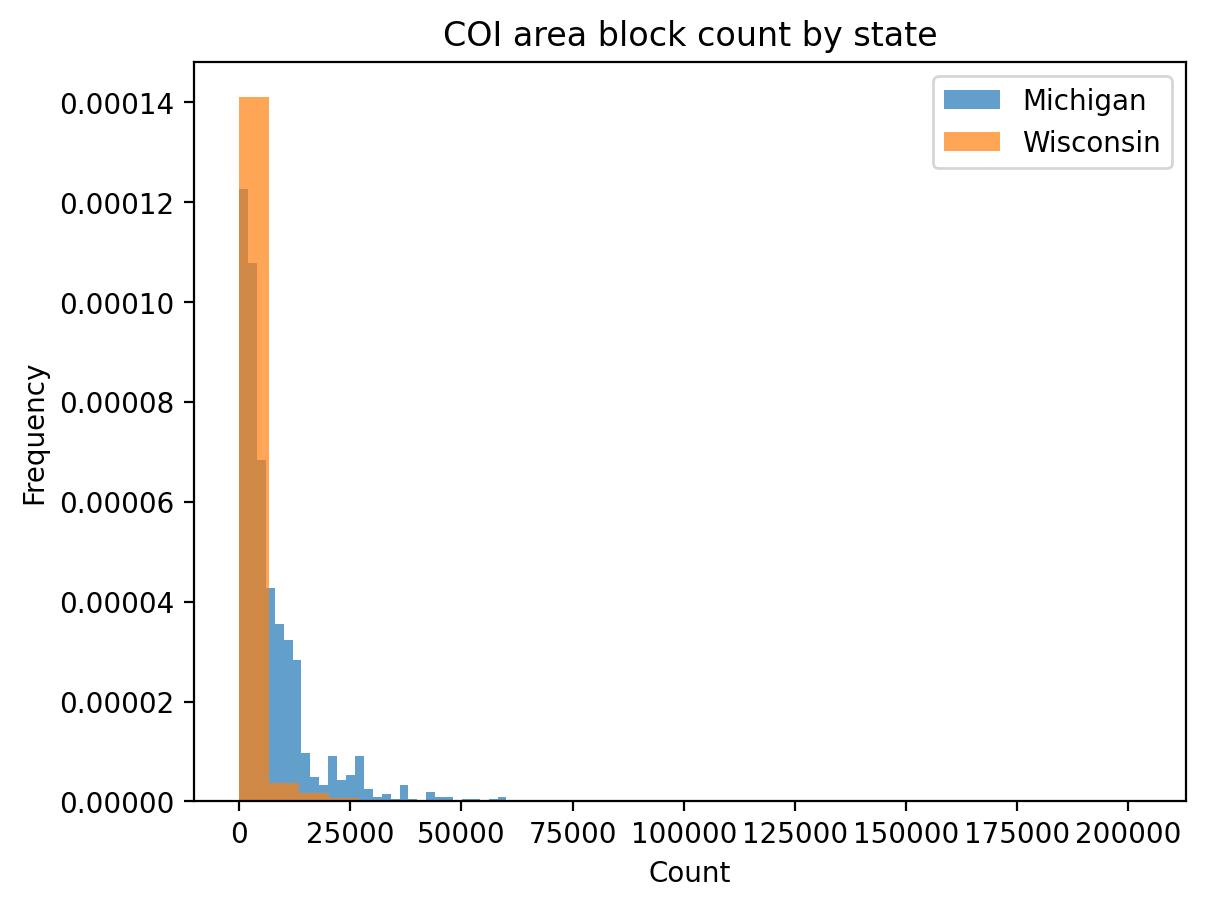

In [174]:
fig, ax = plt.subplots()
for state, df in state_cois.items():
    df["block_count"].plot.hist(label=state, alpha=0.7, bins=30, ax=ax, density=True)
plt.title("COI area block count by state")
plt.xlabel("Count")
plt.legend()
plt.show()

User-generated data is susceptible to extreme outliers. Let's remove the extreme tails and zoom in a bit...

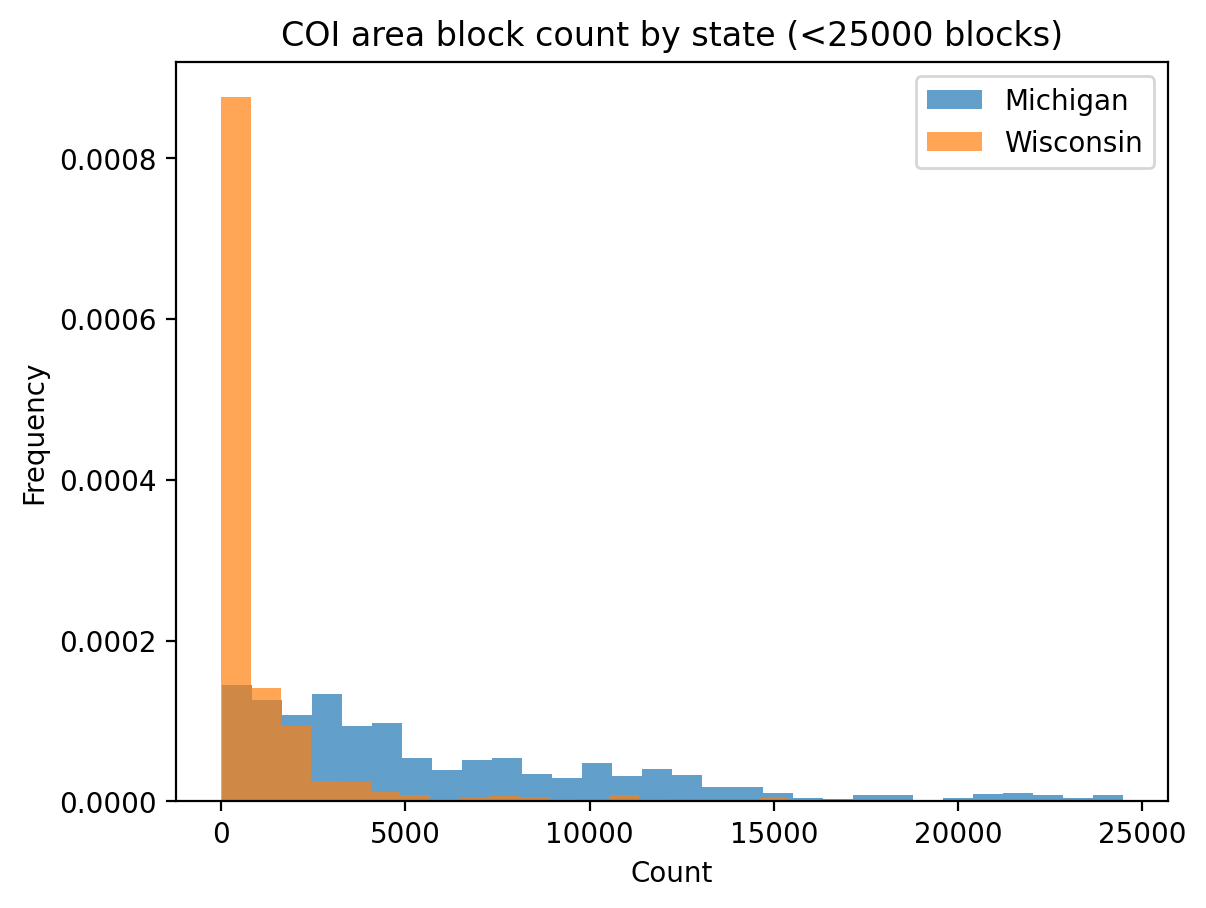

In [175]:
fig, ax = plt.subplots()
hist_params = dict(alpha=0.7, bins=30, ax=ax, density=True)
max_blocks = 25000
for state, df in state_cois.items():
    df["block_count"][df["block_count"] < max_blocks].plot.hist(label=state, alpha=0.7, bins=30, ax=ax, density=True)
plt.title(f"COI area block count by state (<{max_blocks} blocks)")
plt.xlabel("Count")
plt.legend()
plt.show()

In [177]:
block_gdfs = {
    state: gpd.read_file(f"https://www2.census.gov/geo/tiger/TIGER2024/TABBLOCK20/tl_2024_{fips}_tabblock20.zip").set_index("GEOID20")
    for state, fips in zip(("Michigan", "Wisconsin"), ("26", "55"))
}

In [181]:
land_areas = {
    state: dict(gdf["ALAND20"])
    for state, gdf in block_gdfs.items()
}

In [187]:
for state, df in state_cois.items():
    df["land_area"] = df["blocks_2020"].apply(lambda blocks: sum(land_areas[state][geoid] for geoid in blocks))

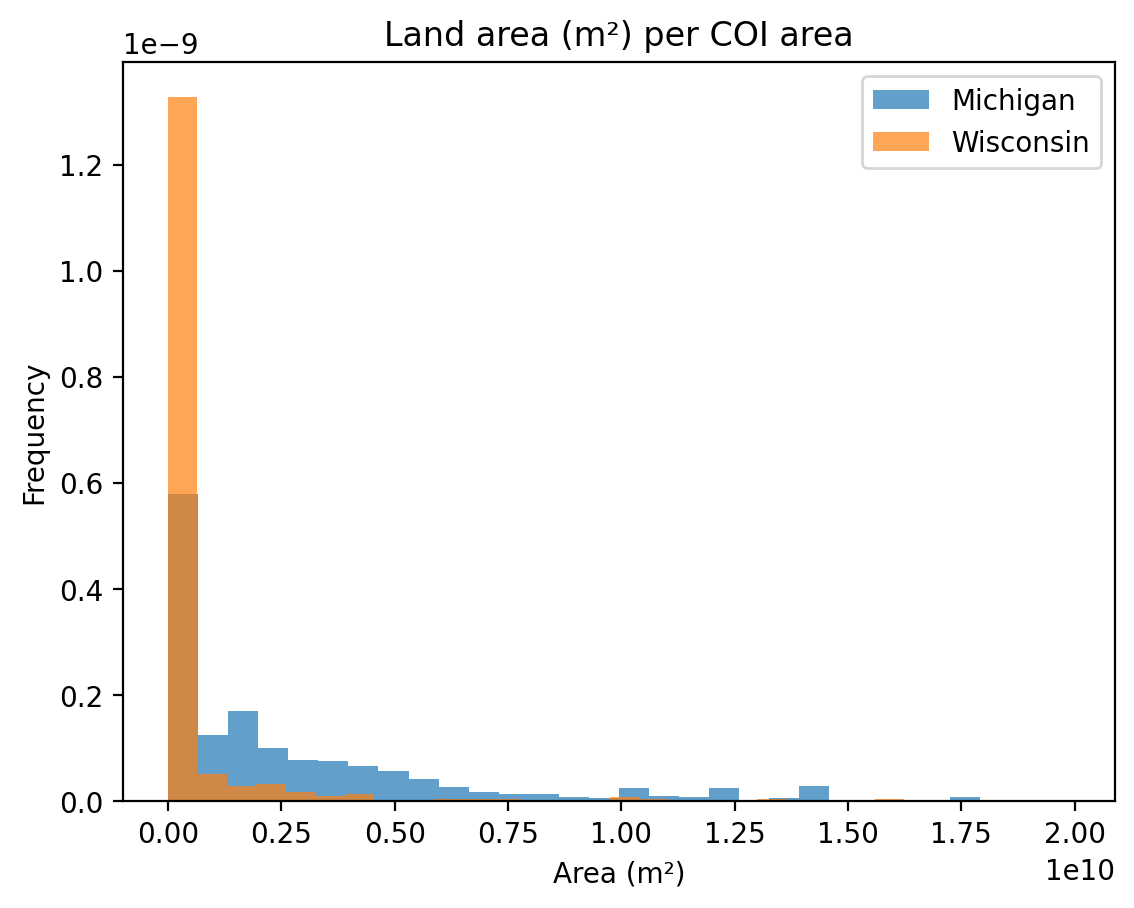

In [190]:
fig, ax = plt.subplots()
max_land_area = 2 * 10**10
for state, df in state_cois.items():
    df["land_area"][df["land_area"] < max_land_area].plot.hist(label=state, alpha=0.7, bins=30, ax=ax, density=True)
plt.title("Land area (m²) per COI area")
plt.xlabel("Area (m²)")
plt.legend()
plt.show()